In [1]:
# ссылка на hw1
# https://github.com/itmo-ml-lab-ML-course/parser-KanopusSTR

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline

from sklearn.metrics import mean_absolute_percentage_error

In [97]:
def MAPE(y_test, predicated):
    return mean_absolute_percentage_error(y_test, predicated) * 100

In [98]:
raw_data = pd.read_csv('out.csv')

In [99]:
res = raw_data.join(raw_data.Type.str.get_dummies('?').add_prefix('T_'))
res = raw_data.join(res.Magazine.str.get_dummies('?').add_prefix('T_'))

raw_data = res.drop(['Type', 'Magazine'], axis=1)

In [100]:
scaler = StandardScaler()

y = raw_data['SCORE']

raw_data = raw_data.drop('SCORE', axis=1)

scaler.fit(raw_data)

scaled_features = scaler.transform(raw_data)
scaled_data = pd.DataFrame(scaled_features, columns=raw_data.columns)

x = scaled_data

x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size=0.2)
x_valid_data, x_test_data, y_valid_data, y_test_data = train_test_split(x_test_data, y_test_data, test_size=0.5)

In [101]:
from sklearn.neighbors import KNeighborsRegressor

98


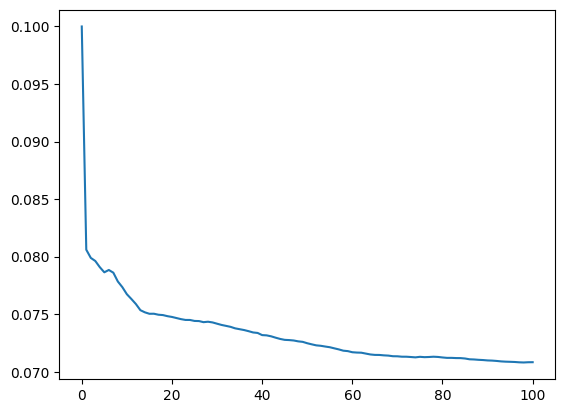

In [102]:
# Нахождение гиперпараметра

error_rates = [0.1]

for i in np.arange(1, 101):
    new_model = KNeighborsRegressor(n_neighbors=i)
    new_model.fit(x_training_data, y_training_data)
    new_predictions = new_model.predict(x_valid_data)
    error_rates.append(mean_absolute_percentage_error(y_test_data, new_predictions))

plt.plot(error_rates)

neighbors_param = error_rates.index(min(error_rates))
print(neighbors_param)

In [103]:
neighbors_model = KNeighborsRegressor(n_neighbors=neighbors_param)

neighbors_model.fit(x_training_data, y_training_data)

neighbors_predictions = neighbors_model.predict(x_test_data)

from sklearn.metrics import mean_absolute_percentage_error

MAPE(y_test_data, neighbors_predictions)

2.5743934910437973

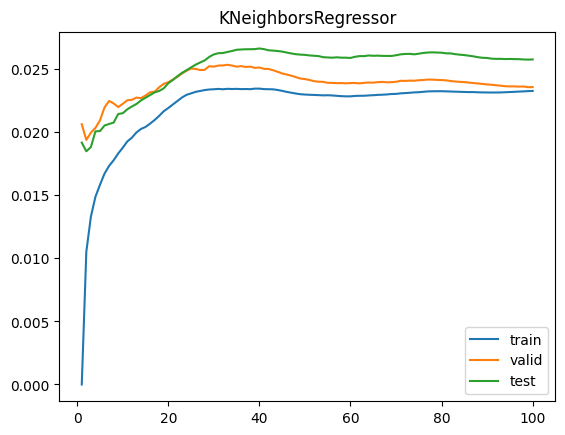

In [104]:
error_rates_train = [None]
error_rates_valid = [None]
error_rates_test = [None]

for i in np.arange(1, 101):
    new_model = KNeighborsRegressor(n_neighbors=i)
    new_model.fit(x_training_data, y_training_data)
    error_rates_train.append(mean_absolute_percentage_error(y_training_data, new_model.predict(x_training_data)))
    error_rates_valid.append(mean_absolute_percentage_error(y_valid_data, new_model.predict(x_valid_data)))
    error_rates_test.append(mean_absolute_percentage_error(y_test_data, new_model.predict(x_test_data)))

plt.plot(error_rates_train, label = "train")
plt.plot(error_rates_valid, label = "valid")
plt.plot(error_rates_test, label = "test")
plt.title('KNeighborsRegressor') 
plt.legend() 
plt.show()

In [105]:
from sklearn.linear_model import SGDRegressor

100%|██████████| 100/100 [00:02<00:00, 34.15it/s]


1


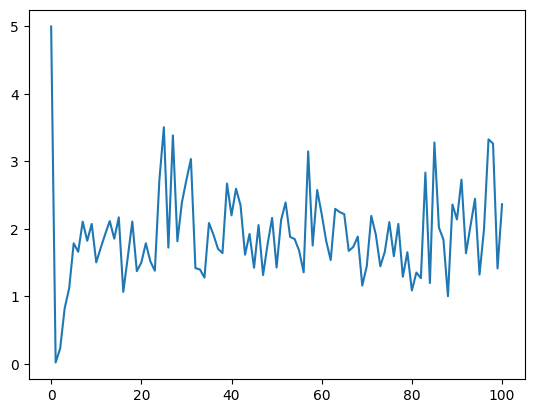

In [106]:
# Нахождение гиперпараметра

from numpy import exp

error_rates = [5]

for i in tqdm.tqdm(np.arange(1, 101)):
    new_model = SGDRegressor(alpha=(1 / exp(i)))
    new_model.fit(x_training_data, y_training_data)
    new_predictions = new_model.predict(x_valid_data)
    error_rates.append(mean_absolute_percentage_error(y_valid_data, new_predictions))

plt.plot(error_rates)

_linear_param = error_rates.index(min(error_rates))

print(_linear_param)

linear_param = 1 / exp(error_rates.index(min(error_rates)))

In [107]:
slr = SGDRegressor(alpha=linear_param)
slr.fit(x_training_data, y_training_data)
linear_predictions = slr.predict(x_test_data)

MAPE(y_test_data, linear_predictions)

1.8890131022210412

100%|██████████| 100/100 [00:03<00:00, 27.72it/s]


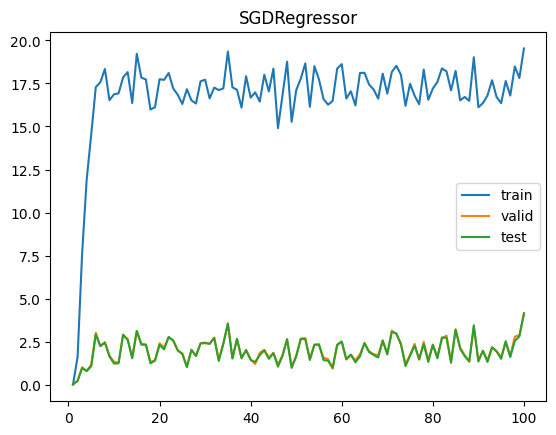

In [108]:
error_rates_train = [None]
error_rates_valid = [None]
error_rates_test = [None]

for i in tqdm.tqdm(np.arange(1, 101)):
    new_model = SGDRegressor(alpha=(1 / exp(i)))
    new_model.fit(x_training_data, y_training_data)
    error_rates_train.append(mean_absolute_percentage_error(y_training_data, new_model.predict(x_training_data)))
    error_rates_valid.append(mean_absolute_percentage_error(y_valid_data, new_model.predict(x_valid_data)))
    error_rates_test.append(mean_absolute_percentage_error(y_test_data, new_model.predict(x_test_data)))

plt.plot(error_rates_train, label = "train")
plt.plot(error_rates_valid, label = "valid")
plt.plot(error_rates_test, label = "test")
plt.title('SGDRegressor') 
plt.legend() 
plt.show()

In [109]:
from sklearn.tree import DecisionTreeRegressor

100%|██████████| 100/100 [00:01<00:00, 58.76it/s]


1


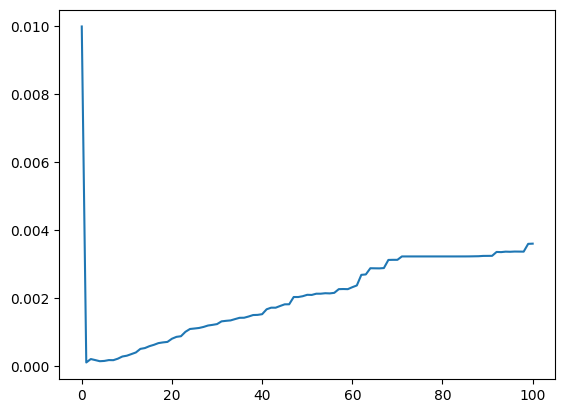

In [111]:
# Нахождение гиперпараметра

error_rates = [0.01]

for i in tqdm.tqdm(np.arange(1, 101)):
    new_model = DecisionTreeRegressor(min_samples_leaf=i)
    new_model.fit(x_training_data, y_training_data)
    new_predictions = new_model.predict(x_valid_data)
    error_rates.append(mean_absolute_percentage_error(y_valid_data, new_predictions))

plt.plot(error_rates)

tree_param = error_rates.index(min(error_rates))

print(tree_param)

In [112]:
tree_model = DecisionTreeRegressor(min_samples_leaf=tree_param)
tree_model.fit(x_training_data, y_training_data)

tree_predictions = tree_model.predict(x_test_data)

MAPE(y_test_data, tree_predictions)

0.032186801033257786

100%|██████████| 100/100 [00:02<00:00, 45.65it/s]


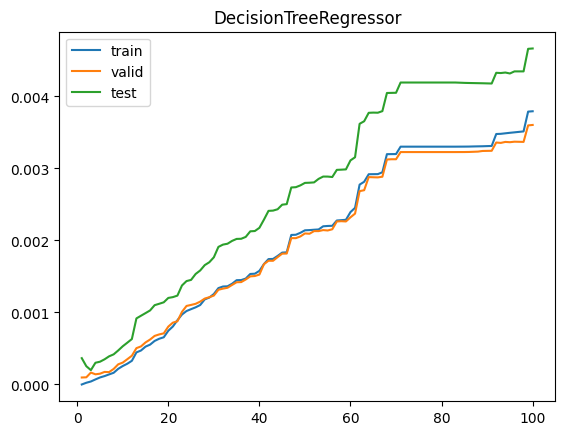

In [113]:
error_rates_train = [None]
error_rates_valid = [None]
error_rates_test = [None]

for i in tqdm.tqdm(np.arange(1, 101)):
    new_model =  DecisionTreeRegressor(min_samples_leaf=i)
    new_model.fit(x_training_data, y_training_data)
    error_rates_train.append(mean_absolute_percentage_error(y_training_data, new_model.predict(x_training_data)))
    error_rates_valid.append(mean_absolute_percentage_error(y_valid_data, new_model.predict(x_valid_data)))
    error_rates_test.append(mean_absolute_percentage_error(y_test_data, new_model.predict(x_test_data)))

plt.plot(error_rates_train, label = "train")
plt.plot(error_rates_valid, label = "valid")
plt.plot(error_rates_test, label = "test")
plt.title('DecisionTreeRegressor') 
plt.legend() 
plt.show()

In [114]:
from sklearn.ensemble import VotingRegressor


model_1 = KNeighborsRegressor(n_neighbors=neighbors_param)
model_2 = SGDRegressor(alpha=linear_param)
model_3 = (DecisionTreeRegressor(min_samples_leaf=tree_param))

100%|██████████| 100/100 [01:05<00:00,  1.53it/s]

48


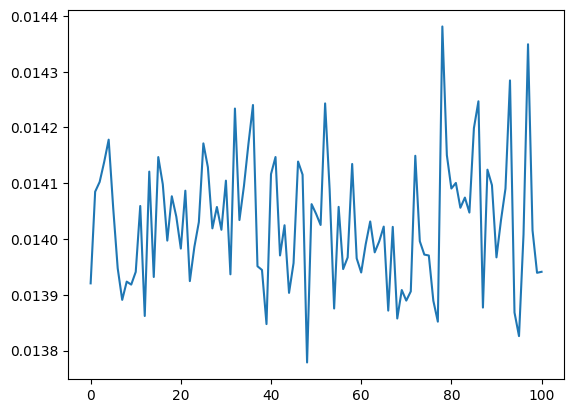

In [121]:
# Нахождение гиперпараметра

error_rates = []

new_model = VotingRegressor([('knc', model_1), ('sgd', model_2), ('dtc', model_3)], n_jobs=-1)
new_model.fit(x_training_data, y_training_data)
new_predictions = new_model.predict(x_valid_data)
error_rates.append(mean_absolute_percentage_error(y_valid_data, new_predictions))

for i in tqdm.tqdm(np.arange(1, 101)):
    new_model = VotingRegressor([('knc', model_1), ('sgd', model_2), ('dtc', model_3)], n_jobs=i)
    new_model.fit(x_training_data, y_training_data)
    new_predictions = new_model.predict(x_valid_data)
    error_rates.append(mean_absolute_percentage_error(y_valid_data, new_predictions))

plt.plot(error_rates)

ensemble_param = error_rates.index(min(error_rates))

if ensemble_param == 0:
    ensemble_param = -1

print(ensemble_param)

In [122]:
final_model = VotingRegressor([('knc', model_1), ('sgd', model_2), ('dtc', model_3)], n_jobs=ensemble_param)

final_model.fit(x_training_data, y_training_data)

ensemble_predications = final_model.predict(x_test_data)

MAPE(y_test_data, ensemble_predications)

1.4667583986905601

100%|██████████| 100/100 [01:29<00:00,  1.11it/s]


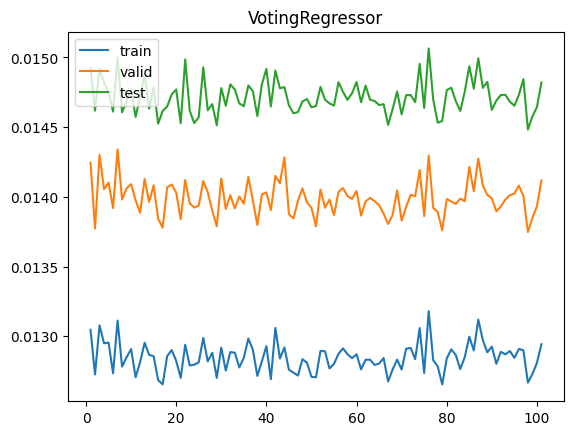

In [119]:
error_rates_train = [None]
error_rates_valid = [None]
error_rates_test = [None]

new_model = VotingRegressor([('sgd', model_1), ('knc', model_2), ('dtc', model_3)], n_jobs=-1)
new_model.fit(x_training_data, y_training_data)
error_rates_train.append(mean_absolute_percentage_error(y_training_data, new_model.predict(x_training_data)))
error_rates_valid.append(mean_absolute_percentage_error(y_valid_data, new_model.predict(x_valid_data)))
error_rates_test.append(mean_absolute_percentage_error(y_test_data, new_model.predict(x_test_data)))

for i in tqdm.tqdm(np.arange(1, 101)):
    new_model =  VotingRegressor([('sgd', model_1), ('knc', model_2), ('dtc', model_3)], n_jobs=i)
    new_model.fit(x_training_data, y_training_data)
    error_rates_train.append(mean_absolute_percentage_error(y_training_data, new_model.predict(x_training_data)))
    error_rates_valid.append(mean_absolute_percentage_error(y_valid_data, new_model.predict(x_valid_data)))
    error_rates_test.append(mean_absolute_percentage_error(y_test_data, new_model.predict(x_test_data)))

plt.plot(error_rates_train, label = "train")
plt.plot(error_rates_valid, label = "valid")
plt.plot(error_rates_test, label = "test")
plt.title('VotingRegressor') 
plt.legend() 
plt.show()